In [85]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [86]:
import numpy as np
import pandas as pd

In [87]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [88]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [89]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [90]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [91]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [92]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [93]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [94]:
# Design a query to retrieve the last 12 months from 08-23-2017 of precipitation data and plot the results
Lyr=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Lstyr=str(Lyr)[2:-3]
Lstyr

#all 12 months of precipitation
engine.execute("SELECT * FROM measurement WHERE DATE >'2016-08-22' ").fetchall()

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'U

In [95]:
# Calculate the date 1 year ago from today
Date1yrago=dt.date.today()-dt.timedelta(days=365)
print(Date1yrago)


2017-09-10


In [26]:
# Perform a query to retrieve the data and precipitation scores
#data=[Measurement.date,Measurement.prcp]
#prep=session.query(*data).\
#filter((Measurement.date>Date1yrago)).all()

#prep

#mmh not getting data to 2018 why???

[]

In [96]:
 #Perform a query to retrieve the data and precipitation scores
data=pd.read_sql_query("select date,prcp from measurement where date >'2016-08-22';",engine)
data

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [97]:
#saving query results as a Pandas Dataframe setting the date column as the index
data2=data.set_index("date")
data2.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [98]:
#sort dataframe values by "date"
data3=data2.sort_values(by=["date"])
data3.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


<IPython.core.display.Javascript object>


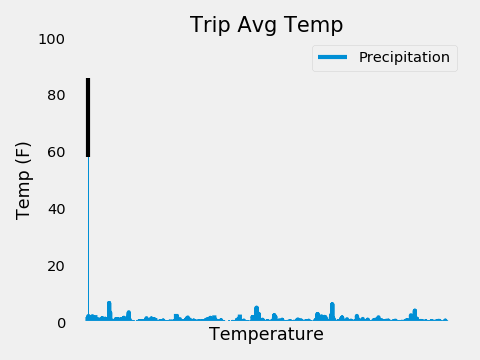

In [102]:

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(data3.index.values,data3.prcp)

plt.xlabel("Date")
plt.ylabel("precipitation")
plt.title("Precipitation over a period of one year(08/23/2016 - 08/23/2017)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
#plt.tight_layout()
plt.savefig("Images/Prcp.png")
plt.show()
# Rotate the xticks for the dates


In [101]:
data3.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [103]:
# How many stations are available in this dataset?
inspector=inspect(engine)
columns=inspector.get_columns("station")

for c in columns:
    print(c["name"],c["type"])

#Number of stations
count=session.query(func.count(Station.station))[0][0]
print(f"Total number of stations is {count}.")




id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
Total number of stations is 9.


In [106]:
# What are the most active stations?
# List the stations and the counts in descending order.
# 3.2 Station Analysis (cont) - Design a query to find the most active stations.
A_stn= session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
dfA_stn = pd.DataFrame(A_stn, columns=['Station','TOBS'])
dfA_stn.head(10)
#print(dfStationActivity)
#print(f'Station {dfStationActivity.Station[0]} had the most temperature observations. Total={dfStationActivity.TOBS[0]}')

,Station,TOBS
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [111]:
#step to identifying the most active stations

Acv_stn = session.query(Station.name, Measurement.station, func.count(Measurement.prcp)).\
           select_from(Measurement).\
           join(Station, Station.station == Measurement.station).\
           group_by(Measurement.station).\
           order_by(func.count(Measurement.prcp).desc())


# Identifying the top active station
Name =Acv_stn[0][0]
Code_name = sq[0][1]
TT_count = sq[0][2]
print(f"The most active station is {Code_name} also known as {Name} with {TT_count} observations.")

The most active station is USC00519281 also known as WAIHEE 837.5, HI US with 2772 observations.


In [112]:
#count of stations in descending order
for station in Acv_stn:
    print(station)

('WAIHEE 837.5, HI US', 'USC00519281', 2772)
('KANEOHE 838.1, HI US', 'USC00513117', 2696)
('WAIKIKI 717.2, HI US', 'USC00519397', 2685)
('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2572)
('MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2484)
('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830', 1937)
('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1932)
('PEARL CITY, HI US', 'USC00517948', 683)
('UPPER WAHIAWA 874.3, HI US', 'USC00518838', 342)


In [113]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
def A_station (start_date, end_date):
   sel = [
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)
   ]
   return session.query(*sel) \
       .filter(Measurement.date >= start_date , Measurement.date <= end_date) \
       .filter(Measurement.station == "USC00519281").all()

Temp_rec = (A_station('2016-08-23', '2017-08-23'))
print(Temp_rec)


[(59.0, 83.0, 73.10795454545455)]


In [114]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Stn = session.query(Measurement.date, Measurement.tobs)\
   .filter(Measurement.station==Code_name)\
   .filter(Measurement.date > Date1yrago)\
   .order_by(Measurement.tobs).all()

df = pd.DataFrame(Stn, columns=["date","tobs"])

#plt.subplots(figsize=(9,3))

plt.hist(df["tobs"], 12)
plt.title(f"Station {Code_name} 12months Temp Frequency")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid()
plt.savefig("Images/most_active.png")
plt.show();


In [116]:
#Days for my trip
#Day1="20"



# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [121]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#trip days
Day1="2018-02-28"
lstday = "2018-03-05"

#query
lstyr = (dt.datetime.strptime(Day1, "%Y-%m-%d")-dt.timedelta(days=365)).strftime('%Y-%m-%d')
endtrip = (dt.datetime.strptime(lstday, "%Y-%m-%d")-dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(f"The tmin,tavg and tmax a year ago in relation to my planned trip dates were, {\
   calc_temps(lstyr, endtrip)[0]} respectively.")

The tmin,tavg and tmax a year ago in relation to my planned trip dates were, (64.0, 72.02777777777777, 78.0) respectively.


In [123]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

murugi = calc_temps(lstyr, endtrip)


tmin = murugi[0][0]
tavg = murugi[0][1]
tmax = murugi[0][2]

plt.bar(1,tavg, yerr = tmax-tmin, width = 1)
plt.title("Trip Avg Temp")
plt.xticks([])
plt.ylim(0,100)
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig("Images/TripAvgTemp.png")
plt.show()


In [125]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.

rainfall = session.query(Measurement.station, func.sum(Measurement.prcp))\
   .group_by(Measurement.station)\
   .filter(Measurement.date >= "2017-02-28" , Measurement.date <= "2017-03-05")\
   .order_by(func.sum(Measurement.prcp).desc()).statement

rainfall = pd.read_sql_query(rainfall, engine)
rainfall.columns = ['station', 'total precipitation']
rainfall
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



,station,total precipitation
0,USC00519281,4.72
1,USC00513117,4.45
2,USC00516128,4.07
3,USC00517948,2.98
4,USC00519397,2.74
5,USC00519523,2.32
6,USC00514830,1.16


In [126]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
prcp= session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation)\
    .filter(Measurement.date >= '2017-02-28', Measurement.date <= '2017-03-05')\
    .filter(Measurement.station == Station.station)\
    .group_by(Measurement.station)\
    .order_by(func.sum(Measurement.prcp).desc()).statement

prcp= pd.read_sql_query(prcp, engine)
prcp

,station,name,latitude,longitude,elevation
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0


In [127]:
#join the two datasets to create one dataframe
rain=pd.merge(rainfall,prcp)
rain

,station,total precipitation,name,latitude,longitude,elevation
0,USC00519281,4.72,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,USC00513117,4.45,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00516128,4.07,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
3,USC00517948,2.98,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00519397,2.74,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
5,USC00519523,2.32,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00514830,1.16,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


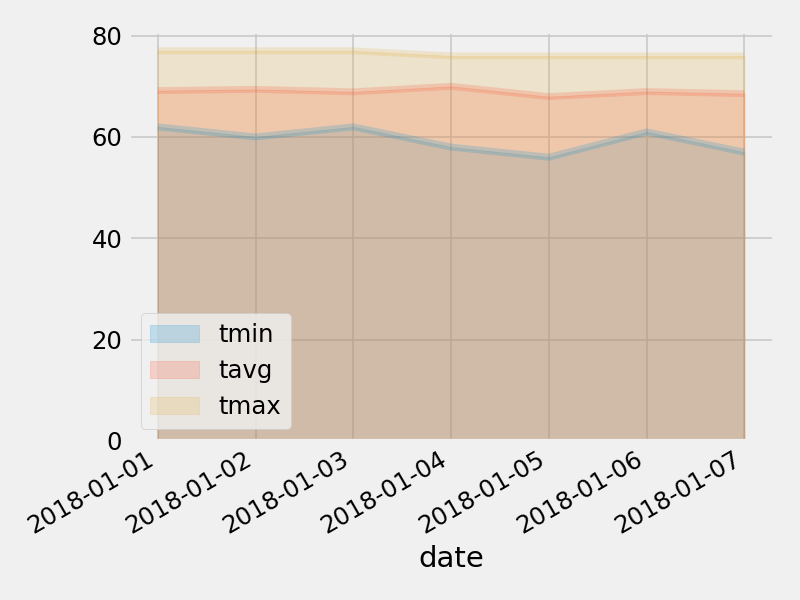

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
